# Implementing derivative of Transfer Matrices

The $TE$ transfer matrix at $\rho_j$ is given by

$$
\begin{align}
TE_j = \frac{1}{2 Z_j}
\begin{bmatrix}
e^{-i \rho_j (Z_{j} - Z_{j-1})} \big(Z_j + Z_{j-1} \big)
&  
e^{-i \rho_j (Z_{j} + Z_{j-1})} \big(Z_j - Z_{j-1} \big) \\[.2cm]
%
e^{i \rho_j (Z_{j} + Z_{j-1})} \big(Z_j - Z_{j-1} \big)
&
e^{i \rho_j (Z_{j} - Z_{j-1})} \big(Z_j + Z_{j-1} \big)
\end{bmatrix}.
\end{align}
$$

It is a function of an input $Z_0$ associated with region $R_0$ via

$$ Z_j^2 = k_0^2 ( n_j^2 - n_0^2) + Z_0^2.$$

We wish to find the derivative of this matrix as a function of $Z_0$.  Using implicit differentiation, we have

$$\frac{\partial Z_j}{\partial Z_0} = \frac{Z_0}{Z_j}.$$

The entries are somewhat extended to compute.  For $TE_j[0,0] = g_{0,0}(Z_0)$ we get:

$$
\begin{align*}
\frac{\partial g_{0,0}}{\partial Z_0} & = g_{0,0} \frac{Z_0}{Z^2_j Z_{j-1}} \left( Z_j - Z_{j-1} \right) \left(1 + i \rho_j Z_j\right).
\end{align*}
$$

We can determine the rest of the derivatives by substitution of $-i$ for $i$ or $-Z_{j-1}$ for $Z_{j-1}$.  The entries are then

$$
\begin{align*}
\frac{\partial g_{0,0}}{\partial Z_0} & = g_{0,0} \frac{Z_0}{Z^2_j Z_{j-1}} \left( Z_j - Z_{j-1} \right) \left(1 + i \rho_j Z_j\right)\\[.05in]
\frac{\partial g_{0,1}}{\partial Z_0} & = g_{0,1} \frac{-Z_0}{Z^2_j Z_{j-1}} \left( Z_j + Z_{j-1} \right) \left(1 + i \rho_j Z_j\right)\\[.05in]
\frac{\partial g_{1,0}}{\partial Z_0} & = g_{1,0} \frac{-Z_0}{Z^2_j Z_{j-1}} \left( Z_j + Z_{j-1} \right) \left(1 - i \rho_j Z_j\right)\\[.05in]
\frac{\partial g_{1,1}}{\partial Z_0} & = g_{1,1} \frac{Z_0}{Z^2_j Z_{j-1}} \left( Z_j - Z_{j-1} \right) \left(1 - i \rho_j Z_j\right).
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

In [23]:
A = SlabExact(ns=[1, 1.4, 1, 1.4, 1], Ts=[1, .1, 1, .2, 1], symmetric=True)
# A.plot_refractive_index()
# A.add_1d_plot(lambda x: x**2 - x**3 + 2*x -1, c='C3')

In [24]:
i = 1
Cs = np.array([1, 2, 3])
A.transfer_matrix(Cs, A.ns[i-1], A.ns[i], A.Rhos[i], derivate=True)

array([[[1.23347717-2.74927151j, 1.23347717+2.74927151j],
        [0.02149252-0.04790423j, 0.02149252+0.04790423j]],

       [[2.77231983-2.58478668j, 2.77231983+2.58478668j],
        [0.31379419-0.29256763j, 0.31379419+0.29256763j]],

       [[2.22432987+3.16092699j, 1.09517031+3.70671078j],
        [1.09517031-3.70671078j, 2.22432987-3.16092699j]]])

In [25]:
A.transmission_matrix(Cs, derivate=True)

array([[[ 1.01158578+0.21822996j, -0.17405893-0.70217748j],
        [-0.17405893+0.70217748j,  1.01158578-0.21822996j]],

       [[ 0.51464185-0.52668091j, -0.24978408+0.03664302j],
        [-0.24978408-0.03664302j,  0.51464185+0.52668091j]],

       [[-0.07592895-0.275493j  , -0.19554199+0.45685053j],
        [-0.19554199-0.45685053j, -0.07592895+0.275493j  ]]])

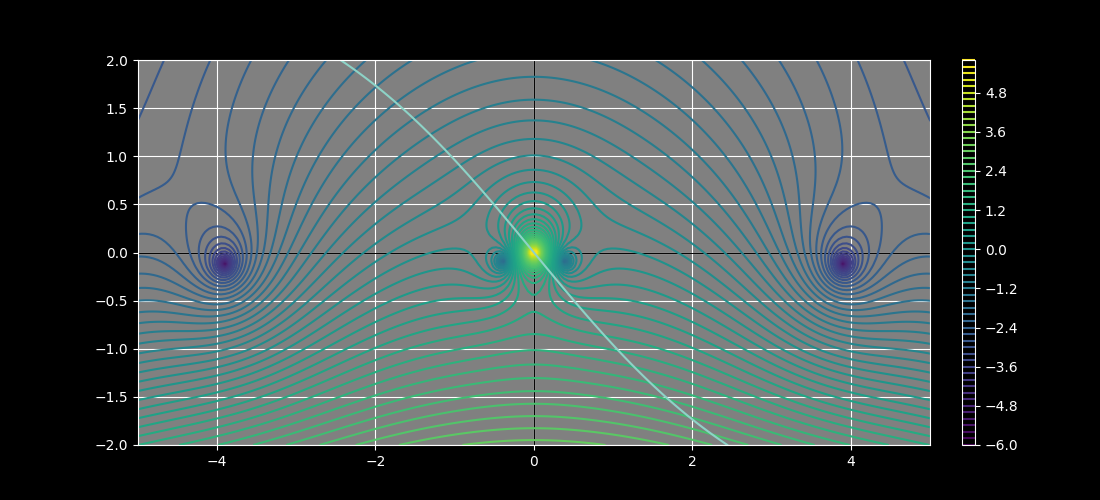

In [27]:
A.determinant_plot(-5, 5, -2, 2, derivate=True);

In [28]:
A.determinant?

Signature:
A.determinant(
    C,
    mode_type='guided',
    plane='Z',
    field_type='TE',
    Normalizer=None,
    sign=1,
    derivate=False,
)
Docstring:
Eigenvalue function (formerly determinant of matching matrix, hence
nomenclature).
File:      ~/local/slab/slab.py
Type:      method

In [30]:
Zp0 = newton(A.determinant, 4, args=('guided', 'Z', 'TE', None, 1, True))

In [32]:
A.determinant(Zp0, derivate=True)

array([-4.30211422e-16+1.16573418e-15j])

In [9]:
def derivative(C, ds=.000001, i=1):
    forward = A.transmission_matrix(C+ds)[...,1,1]
    back = A.transmission_matrix(C-ds)[...,1,1]
    return (forward-back) / (2*ds)

def term(C, i=1):
    base = A.transmission_matrix(C, derivate=True)[...,1,1]
    return base

def diff(C, i=1):
    return derivative(C, i=i) - term(C, i=1)

In [10]:
# def derivative(C, ds=.000001, i=1):
#     forward = A.transfer_matrix(C+ds, A.ns[i-1], A.ns[i], A.Rhos[i])[...,0,0]
#     back = A.transfer_matrix(C-ds, A.ns[i-1], A.ns[i], A.Rhos[i])[...,0,0]
#     return (forward-back) / (2*ds)

# def term(C, i=1):
#     base = A.transfer_matrix(C, A.ns[i-1], A.ns[i], A.Rhos[i], derivate=True)[...,0,0]
#     return base

# def diff(C, i=1):
#     return derivative(C, i=i) - term(C, i=i)

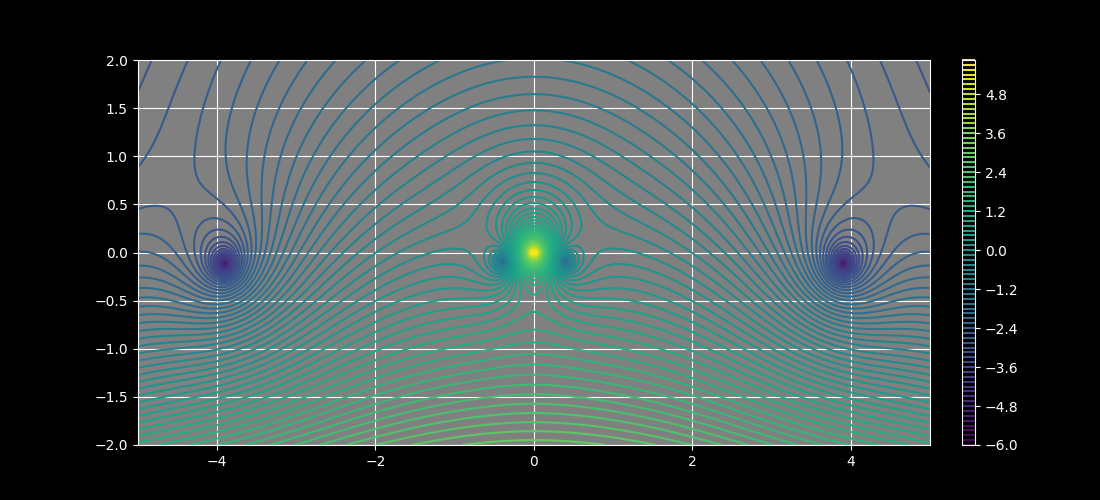

In [11]:
plot_complex(derivative, -5, 5, -2, 2,  iref=200, rref=200, levels=80,)

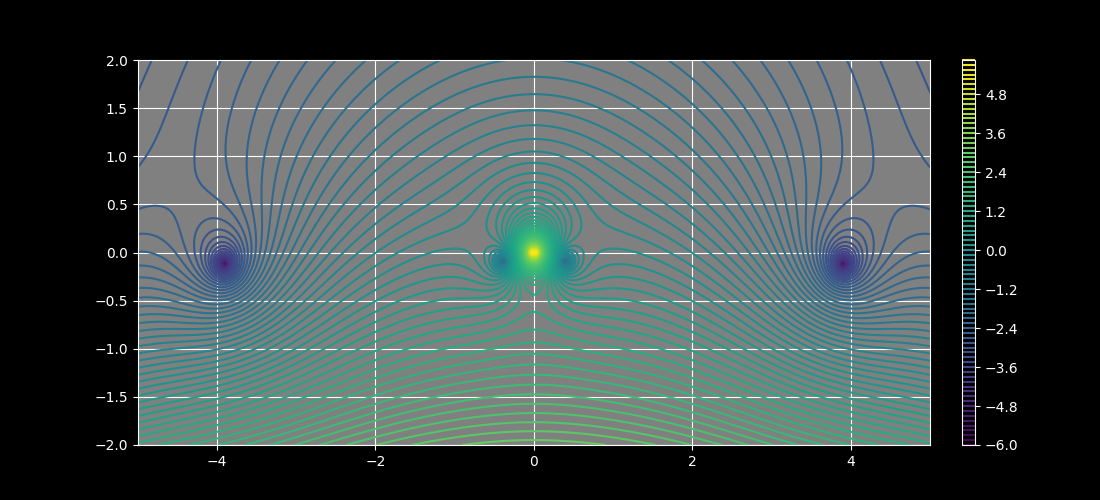

In [12]:
plot_complex(term, -5, 5, -2, 2, iref=200, rref=200, levels=80,)

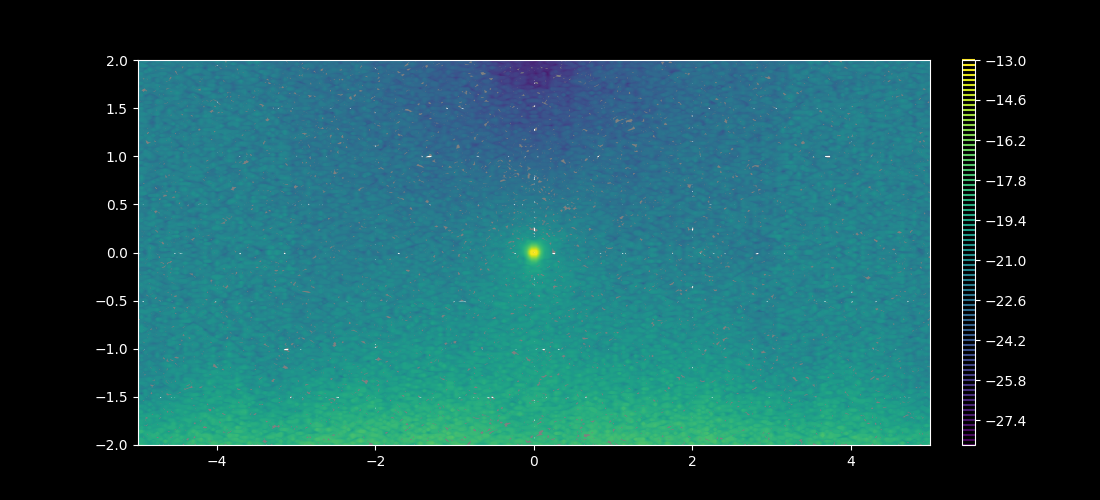

In [17]:
plot_complex(diff, -5, 5, -2, 2, iref=200, rref=200, levels=80,)

Okay something's not right in the transfer matrix derivatives.  Issue was the first order approximation to the derivative wasn't good enough.

Let's look at just the first entry and it's derivative by hand:

In [55]:
def T00(Z0, i=1):
    try:
        len(Z0)
        Z0 = np.array(Z0, dtype=complex)
    except TypeError:
        Z0 = np.array([Z0], dtype=complex)

    Rho, n_left, n_right = A.Rhos[i], A.ns[i-1], A.ns[i]
    
    Z_left = A.Zi_from_Z0(Z0, n_left)
    Z_right = A.Zi_from_Z0(Z0, n_right)

    T = 1 / (2 * Z_right) * np.exp(-1j * (Z_right - Z_left) * Rho) * (Z_right + Z_left)
    return T

def T00_prime_exact(Z0, i=1):
    T = T00(Z0, i=i)
    
    Rho, n_left, n_right = A.Rhos[i], A.ns[i-1], A.ns[i]
    Z_left = A.Zi_from_Z0(Z0, n_left)
    Z_right = A.Zi_from_Z0(Z0, n_right)

    D = Z0 / (Z_right**2 * Z_left) * (Z_right - Z_left) * (1 + 1j * Z_right * Rho)
    T *= D
    return T

def T00_prime_approx(C, ds=.000001, i=1):
    forward = T00(C+ds, i=i)
    back = T00(C-ds, i=i)
    return (forward-back) / (2*ds)

def diff_T00_prime_exact_and_approx(C, i=1):
    return T00_prime_approx(C, i=i) - T00_prime_exact(C, i=i)

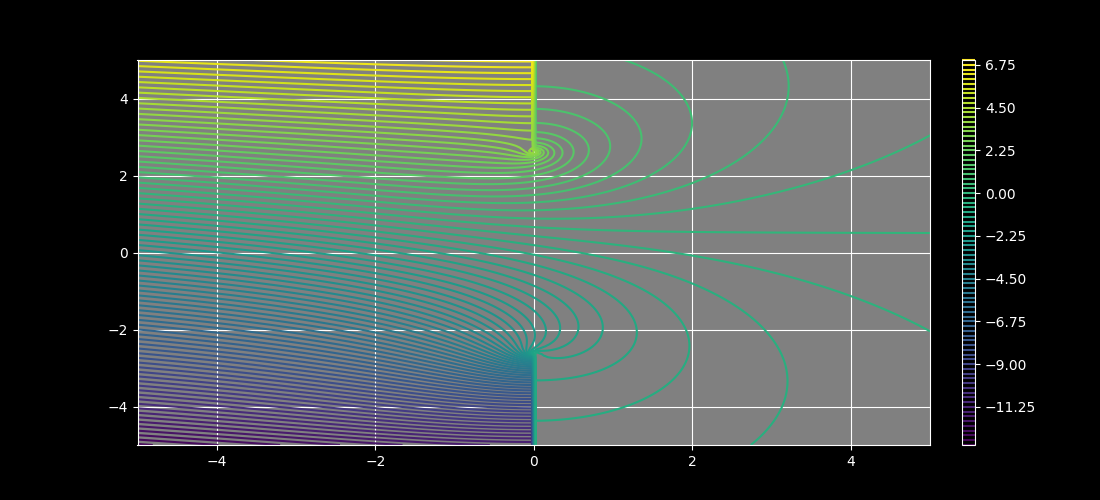

In [56]:
plot_complex(T00, -5, 5, -5, 5, iref=200, rref=200, levels=80,)

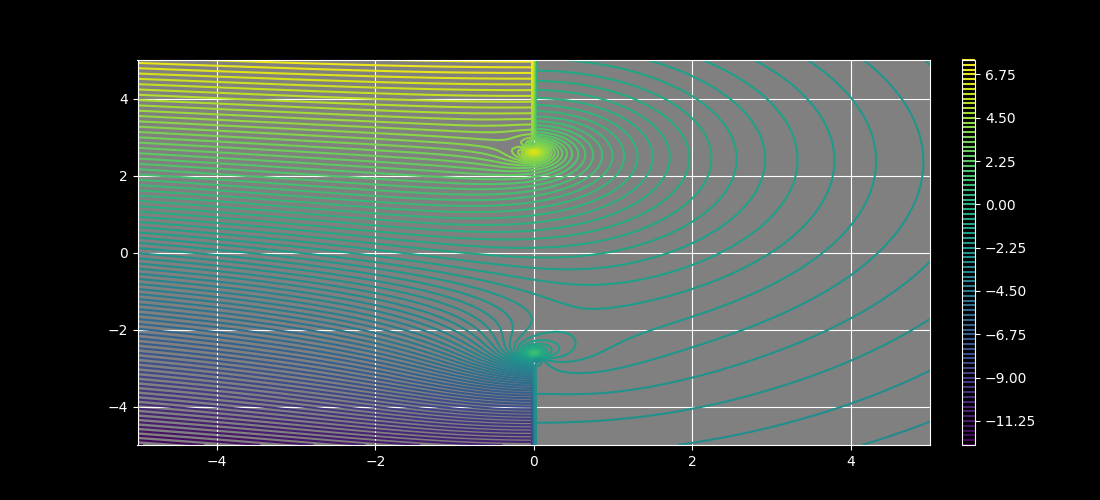

In [57]:
plot_complex(T00_prime_approx, -5, 5, -5, 5, iref=200, rref=200, levels=80,)

Well that's already different: different branch cuts.  Maybe has to do with Zi_from_Z0 method.  But we continue.  Is our derivative actually right?

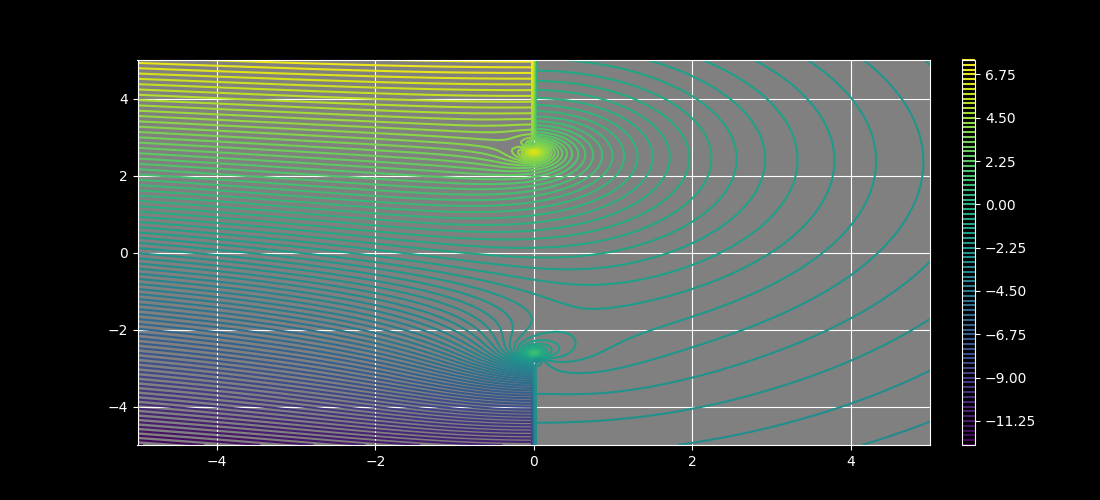

In [58]:
plot_complex(T00_prime_exact, -5, 5, -5, 5, iref=200, rref=200, levels=80,)

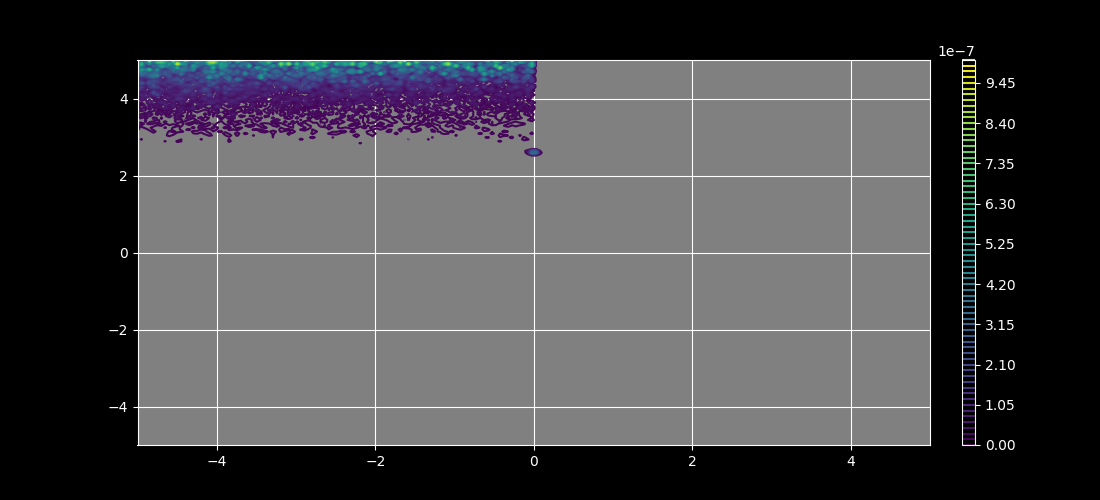

In [61]:
plot_complex(diff_T00_prime_exact_and_approx, -5, 5, -5, 5,  iref=200, rref=200, levels=80, log_abs=False)

No, it looks like our derivative does have an error, either in theory or in implementation.  Checking theory: not finding error.  Checking our check above though and we do find that the first order approximation of the derivative was the issue.  Using an order two central difference approximation let us to find that the derivatives matched.